<a href="https://colab.research.google.com/github/Izect/Teano-Repository2/blob/main/3A_TEA%C3%91O_EXER1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('/content/datasets_house_prices.csv')

In [ ]:
df.head(20)

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05
5,3892,1,38,10.241344,1.170138e+06
6,2438,2,94,22.824169,6.885504e+05
7,2969,4,55,15.821883,8.747031e+05
8,1266,1,42,6.543998,3.800326e+05
9,2038,1,49,26.395987,5.829190e+05


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df[['Size (sqft)', 'Bedrooms', 'Age']] = (df[['Size (sqft)', 'Bedrooms', 'Age']] - df[['Size (sqft)', 'Bedrooms', 'Age']].mean()) / df[['Size (sqft)', 'Bedrooms', 'Age']].std()

In [ ]:
X = df['Size (sqft)'].values
y = df['Price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X.reshape(-1, 1),y)

LinearRegression()

In [ ]:
train_predictions = model.predict(X_train.reshape(-1, 1))
train_mse = np.mean((train_predictions - y_train) ** 2)
print(f'Training MSE: {train_mse}')

Training MSE: 253623305.29391074


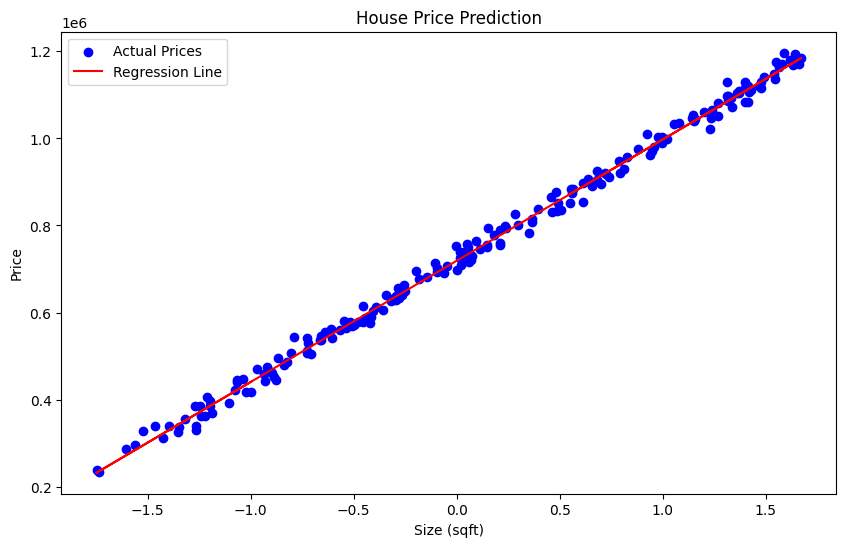

In [ ]:
test_predictions = model.predict(X_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, test_predictions, color='red', label='Regression Line')
plt.title('House Price Prediction')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.legend()
plt.show()